In [1]:
from windIO.utils.yml_utils import validate_yaml
from flow_api import run_foxes, run_pywake
import os
import xarray as xr
from windIO.utils import plant_schemas_path
import matplotlib.pyplot as plt

In [2]:
yml_input = '../examples/cases/windio_4turbines/wind_energy_system/system.yaml'
os.makedirs('output', exist_ok=True)
os.makedirs('results', exist_ok=True)

In [3]:
validate_yaml(yml_input, plant_schemas_path + 'wind_energy_system.yaml')

Validation succeeded


In [4]:
run_foxes(yml_input)

Reading windio file ../examples/cases/windio_4turbines/wind_energy_system/system.yaml
Ignoring 'z0', since no reference_height found. No ABL profile activated.
Selecting default engine 'MultiprocessEngine(chunk_size_states=None, chunk_size_points=None)'
Running farm_calc
Calculating 1000 states for 4 turbines
Computing 16 chunks using 16 processes


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 259.61it/s]

Running output: StateTurbineTable
Writing file results/turbine_data.nc
Running output: SliceData
Calculating data at 10000 points for 1000 states


Computing 16 chunks using 16 processes


100%|███████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  4.94it/s]


Writing file results/flow_field.nc


In [5]:
foxes_dat = xr.load_dataset('./results/turbine_data.nc')
foxes_dat 

<xarray.Dataset> Size: 72kB
Dimensions:                   (time: 1000, turbine: 4)
Coordinates:
  * time                      (time) float64 8kB 0.0 1.0 2.0 ... 998.0 999.0
  * turbine                   (turbine) int64 32B 0 1 2 3
Data variables:
    power                     (time, turbine) float64 32kB 7.056e+06 ... 3.94...
    rotor_effective_velocity  (time, turbine) float64 32kB 10.09 8.287 ... 8.295

In [6]:
run_pywake(yml_input)

(1000,) ()
aep is  <xarray.DataArray 'AEP [GWh]' ()> Size: 8B
np.float64(158.78097755793266) GWh
<xarray.SimulationResult> Size: 176kB
Dimensions:      (wt: 4, time: 1000)
Coordinates:
  * time         (time) int64 8kB 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * wt           (wt) int64 32B 0 1 2 3
    wd           (time) float64 8kB 271.8 266.2 268.7 ... 276.0 266.8 267.1
    ws           (time) float64 8kB 10.09 10.23 8.798 ... 9.704 9.613 10.36
    type         (wt) float64 32B 0.0 0.0 0.0 0.0
Data variables: (12/14)
    WS_eff       (wt, time) float64 32kB 10.09 10.23 8.798 ... 8.826 7.78 8.291
    TI_eff       (wt, time) float64 32kB 2.619 1.537 1.651 ... 4.891 3.751 4.124
    Power        (wt, time) float64 32kB 7.056e+06 7.378e+06 ... 3.939e+06
    CT           (wt, time) float64 32kB 0.814 0.814 0.814 ... 0.8237 0.814
    yaw          int64 8B 0
    tilt         int64 8B 0
    ...           ...
    y            (wt) int64 32B 0 0 0 0
    WD           (time) float64 8kB 271

<xarray.DataArray 'AEP [GWh]' ()> Size: 8B
np.float64(158.78097755793266)

In [7]:
pywake_dat = xr.load_dataset('output/PowerTable.nc')
pywake_dat

<xarray.Dataset> Size: 88kB
Dimensions:               (turbine: 4, time: 1000)
Coordinates:
  * time                  (time) int64 8kB 0 1 2 3 4 5 ... 995 996 997 998 999
  * turbine               (turbine) int64 32B 0 1 2 3
    wd                    (time) float64 8kB 271.8 266.2 268.7 ... 266.8 267.1
    ws                    (time) float64 8kB 10.09 10.23 8.798 ... 9.613 10.36
    type                  (turbine) float64 32B 0.0 0.0 0.0 0.0
Data variables:
    power                 (turbine, time) float64 32kB 7.056e+06 ... 3.939e+06
    effective_wind_speed  (turbine, time) float64 32kB 10.09 10.23 ... 8.291

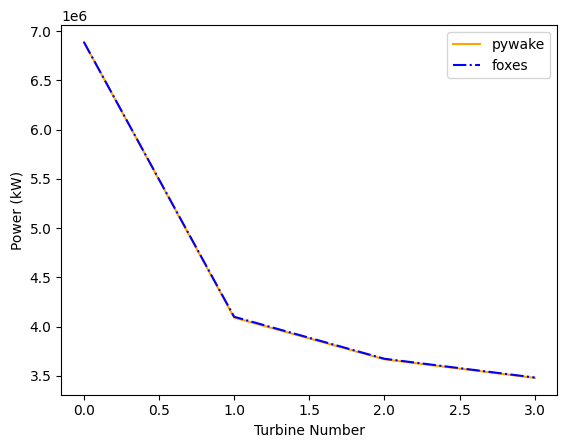

In [9]:
plt.plot(pywake_dat.turbine, pywake_dat.power.mean('time'),c='orange', label="pywake")
plt.plot(foxes_dat.turbine, foxes_dat.power.mean('time'), ls='-.',c='blue', label="foxes")
plt.xlabel('Turbine Number')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

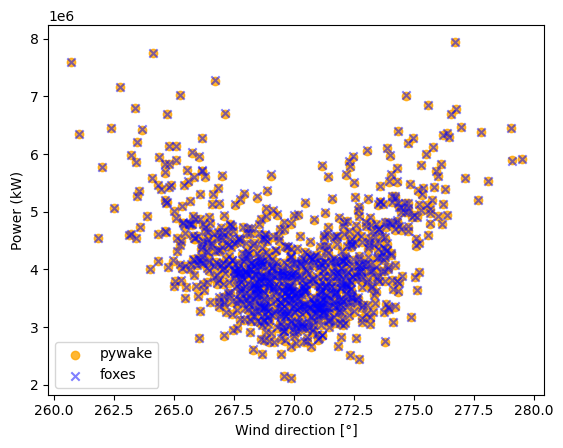

In [10]:
plt.scatter(pywake_dat.wd, pywake_dat.sel(turbine=1).power, c='orange', marker='o',alpha=0.8, label="pywake")
plt.scatter(pywake_dat.wd, foxes_dat.sel(turbine=1).power, c='blue', marker='x',alpha=0.5, label="foxes")
plt.xlabel('Wind direction [°]')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()